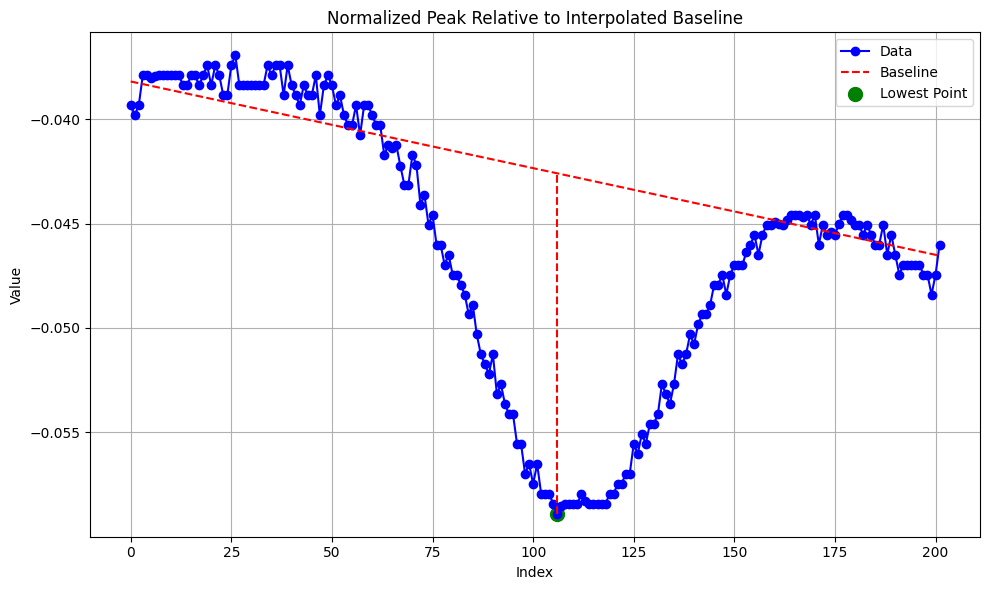

Lowest value found: -0.05889
Normalized value of the lowest peak: -0.016289900497512437


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Complete dataset provided
data = [
    -3.934E-002, -3.982E-002, -3.934E-002, -3.791E-002, -3.791E-002, -3.803E-002,
    -3.794E-002, -3.791E-002, -3.791E-002, -3.791E-002, -3.791E-002, -3.791E-002,
    -3.791E-002, -3.839E-002, -3.839E-002, -3.791E-002, -3.791E-002, -3.839E-002,
    -3.791E-002, -3.743E-002, -3.839E-002, -3.743E-002, -3.791E-002, -3.886E-002,
    -3.886E-002, -3.743E-002, -3.695E-002, -3.839E-002, -3.839E-002, -3.839E-002,
    -3.839E-002, -3.839E-002, -3.839E-002, -3.839E-002, -3.743E-002, -3.791E-002,
    -3.743E-002, -3.743E-002, -3.886E-002, -3.743E-002, -3.839E-002, -3.886E-002,
    -3.934E-002, -3.839E-002, -3.886E-002, -3.886E-002, -3.791E-002, -3.982E-002,
    -3.839E-002, -3.791E-002, -3.839E-002, -3.934E-002, -3.886E-002, -3.982E-002,
    -4.029E-002, -4.029E-002, -3.934E-002, -4.077E-002, -3.934E-002, -3.934E-002,
    -3.982E-002, -4.029E-002, -4.029E-002, -4.172E-002, -4.125E-002, -4.137E-002,
    -4.125E-002, -4.223E-002, -4.315E-002, -4.315E-002, -4.172E-002, -4.220E-002,
    -4.411E-002, -4.363E-002, -4.506E-002, -4.458E-002, -4.601E-002, -4.601E-002,
    -4.697E-002, -4.649E-002, -4.745E-002, -4.745E-002, -4.792E-002, -4.840E-002,
    -4.935E-002, -4.888E-002, -5.031E-002, -5.126E-002, -5.174E-002, -5.221E-002,
    -5.126E-002, -5.317E-002, -5.269E-002, -5.364E-002, -5.412E-002, -5.412E-002,
    -5.555E-002, -5.555E-002, -5.698E-002, -5.651E-002, -5.746E-002, -5.651E-002,
    -5.794E-002, -5.794E-002, -5.794E-002, -5.841E-002, -5.889E-002, -5.853E-002,
    -5.841E-002, -5.841E-002, -5.841E-002, -5.841E-002, -5.794E-002, -5.829E-002,
    -5.841E-002, -5.841E-002, -5.841E-002, -5.841E-002, -5.841E-002, -5.794E-002,
    -5.794E-002, -5.746E-002, -5.746E-002, -5.698E-002, -5.698E-002, -5.555E-002,
    -5.603E-002, -5.507E-002, -5.555E-002, -5.460E-002, -5.460E-002, -5.412E-002,
    -5.269E-002, -5.317E-002, -5.364E-002, -5.269E-002, -5.126E-002, -5.174E-002,
    -5.126E-002, -5.031E-002, -5.078E-002, -4.983E-002, -4.935E-002, -4.935E-002,
    -4.888E-002, -4.792E-002, -4.792E-002, -4.745E-002, -4.840E-002, -4.745E-002,
    -4.697E-002, -4.697E-002, -4.697E-002, -4.637E-002, -4.601E-002, -4.554E-002,
    -4.649E-002, -4.554E-002, -4.506E-002, -4.506E-002, -4.494E-002, -4.503E-002,
    -4.506E-002, -4.482E-002, -4.458E-002, -4.458E-002, -4.458E-002, -4.470E-002,
    -4.458E-002, -4.506E-002, -4.458E-002, -4.601E-002, -4.506E-002, -4.554E-002,
    -4.542E-002, -4.554E-002, -4.503E-002, -4.458E-002, -4.458E-002, -4.482E-002,
    -4.506E-002, -4.506E-002, -4.554E-002, -4.506E-002, -4.554E-002, -4.601E-002,
    -4.601E-002, -4.506E-002, -4.649E-002, -4.554E-002, -4.649E-002, -4.745E-002,
    -4.697E-002, -4.697E-002, -4.697E-002, -4.697E-002, -4.697E-002, -4.745E-002,
    -4.745E-002, -4.840E-002, -4.745E-002, -4.601E-002
]

# Convert data to numpy array for easier manipulation
data = np.array(data)

# Function to find the lowest point using a 3-point peak picking process
def find_lowest_point(data):
    n = len(data)
    lowest_value = data[0]  # Initialize with the first value
    lowest_index = 0
    
    # Iterate through the data to find the lowest point
    for i in range(1, n-1):
        if data[i] < data[i-1] and data[i] < data[i+1]:
            if data[i] < lowest_value:
                lowest_value = data[i]
                lowest_index = i
    
    return lowest_index, lowest_value

# Function to interpolate the baseline
def interpolate_baseline(data):
    left_segment_mean = np.mean(data[:20])  # Mean of the first 20 points
    right_segment_mean = np.mean(data[-20:])  # Mean of the last 20 points
    
    baseline_slope = (right_segment_mean - left_segment_mean) / (len(data) - 1)
    baseline_intercept = left_segment_mean
    
    baseline = baseline_intercept + baseline_slope * np.arange(len(data))
    
    return baseline

# Find the lowest point
lowest_index, lowest_value = find_lowest_point(data)

# Interpolate the baseline
baseline = interpolate_baseline(data)

# Plotting the data with the interpolated baseline
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='b', label='Data')
plt.plot(baseline, linestyle='--', color='r', label='Baseline')
plt.scatter(lowest_index, lowest_value, color='g', s=100, label='Lowest Point')
plt.vlines(lowest_index, lowest_value, baseline[lowest_index], color='r', linestyle='--')

plt.title('Normalized Peak Relative to Interpolated Baseline')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Lowest value found: {lowest_value}")
print(f"Normalized value of the lowest peak: {lowest_value - baseline[lowest_index]}")
